In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from WENO6 import WENO6
from WENO5_minus import WENO5_minus
from matplotlib import cm

In [3]:
sigma=0.3;
rate=0.1; 
E=50;
T=1;
e=10**(-30);

xl=-6
xr=1.5

Smin=np.exp(xl)*E; 
Smax=np.exp(xr)*E; 

G=np.log(Smin/E);
L=np.log(Smax/E);
theta=T;

m=80;
h=(-G+L)/m; 
n=np.ceil((theta*sigma**2)/(0.8*(h**2))) 
#n=200
n=int(n)
t=theta/n;

x=np.linspace(G,L,m+1)
time=np.linspace(0,theta,n+1); 

u=np.zeros((x.shape[0],time.shape[0]));

for k in range(0,m+1):
    if x[k]>0:
        u[k,0]=1/E;  
    else:
        u[k,0]=0;

for j in range(0,n+1):
    u[0,j]=0;
    u[1,j]=0;
    u[2,j]=0;
    u[m,j]=np.exp(-rate*time[j])/E;
    u[m-1,j]=np.exp(-rate*time[j])/E;
    u[m-2,j]=np.exp(-rate*time[j])/E;
    
a=0;

d1=np.exp(-rate*time)/E-t*rate*np.exp(-rate*time)/E;
d2=np.exp(-rate*time)/E-t*rate*np.exp(-rate*time)/E;
d3=np.exp(-rate*time)/E-t*rate*np.exp(-rate*time)/E;

c1=np.exp(-rate*time)/E-0.5*t*rate*np.exp(-rate*time)/E+0.25*(t**2)*(rate**2)*np.exp(-rate*time)/E;
c2=np.exp(-rate*time)/E-0.5*t*rate*np.exp(-rate*time)/E+0.25*(t**2)*(rate**2)*np.exp(-rate*time)/E;
c3=np.exp(-rate*time)/E-0.5*t*rate*np.exp(-rate*time)/E+0.25*(t**2)*(rate**2)*np.exp(-rate*time)/E;



In [10]:
for l in range(1,n+1):
    RHSd=WENO6(u,m,l,e)
    RHSc=WENO5_minus(u,m,l,e)

    u1=np.zeros((x.shape[0]))[:, None]
    u1[3:-3,0]=u[3:-3,l-1]+t*((sigma**2)/(2*h**2)*RHSd+((rate-(sigma**2)/2)/h)*RHSc-rate*u[3:-3,l-1]);

    u1[0:3,0]=[a ,a ,a];
    u1[m-2:,0]=[d1[l-1],d2[l-1] ,d3[l-1]];

    RHS1d=WENO6(u1,m,1,e)  
    RHS1c=WENO5_minus(u1,m,1,e)   

    u2=np.zeros((x.shape[0]))[:, None]
    u2[3:-3,0]=0.75*u[3:-3,l-1]+0.25*u1[3:-3,0]+0.25*t*((sigma**2)/(2*h**2)*RHS1d+((rate-(sigma**2)/2)/h)*RHS1c-rate*u1[3:-3,0]);

    u2[0:3,0]=[a, a ,a];
    u2[m-2:,0]=[c1[l-1], c2[l-1] ,c3[l-1]];

    RHS2d=WENO6(u2,m,1,e);
    RHS2c=WENO5_minus(u2,m,1,e);

    u[3:-3,l]=((1/3)*u[3:-3,l-1]+(2/3)*u2[3:-3,0]+(2/3)*t*((sigma**2)/(2*h**2)*RHS2d+((rate-(sigma**2)/2)/h)*RHS2c))-(2/3)*t*rate*u2[3:-3,0];

    
tt=T-time;
S=E*np.exp(x);
V=np.zeros((m+1,n+1));
for k in range(0,m+1):
    V[k,:]=E*u[k,:]

   


<IPython.core.display.Javascript object>


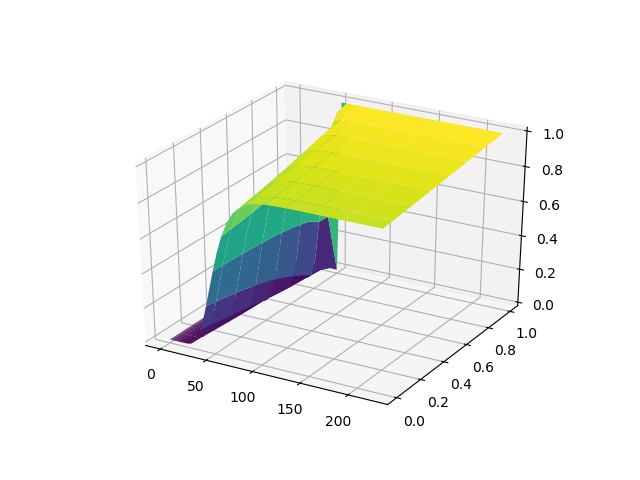

In [11]:
%matplotlib notebook
X,Y = np.meshgrid(S, tt,indexing="ij")

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, V, cmap=cm.viridis, rcount=m, ccount=n)

<IPython.core.display.Javascript object>


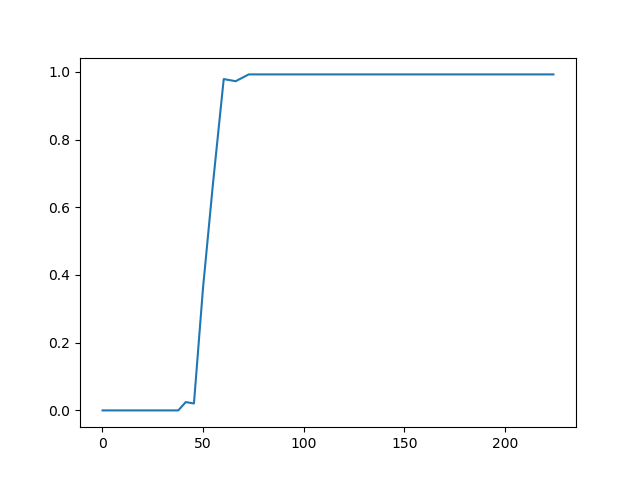

In [13]:
fig,ax=plt.subplots()
ax.plot(S, V[:,1])


In [15]:
u[:,0]

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02])